# Import

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import pathlib

from collections import Counter

import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

In [40]:
path_train_img = os.path.join('/home/wefreire/code/Elias-Yuri-Maximo/x-rays-lewagon/raw_data/', 'train')
path_val_img = os.path.join('/home/wefreire/code/Elias-Yuri-Maximo/x-rays-lewagon/raw_data/', 'val')
path_test_img = os.path.join('/home/wefreire/code/Elias-Yuri-Maximo/x-rays-lewagon/raw_data/', 'test')

train_df = pd.read_csv(os.path.join('/home/wefreire/code/Elias-Yuri-Maximo/x-rays-lewagon/raw_data/', 'train.txt'),
                            sep=" ",
                            index_col=None,
                            header=None
                           )

test_df = pd.read_csv(os.path.join('/home/wefreire/code/Elias-Yuri-Maximo/x-rays-lewagon/raw_data/', 'test.txt'),
                            sep=" ",
                            index_col=None,
                            header=None
                           )

val_df = pd.read_csv(os.path.join('/home/wefreire/code/Elias-Yuri-Maximo/x-rays-lewagon/raw_data/', 'val.txt'),
                            sep=" ",
                            index_col=None,
                            header=None
                           )

# Tratamento de dados

## Renomea colunas

In [41]:
train_df.columns = ["patient_id", "filename", "label", "source"]
test_df.columns = ["patient_id", "filename", "label", "source"]
val_df.columns = ["patient_id", "filename", "label", "source"]

path_train_img = '/home/wefreire/code/Elias-Yuri-Maximo/x-rays-lewagon/raw_data/train'
path_test_img  = '/home/wefreire/code/Elias-Yuri-Maximo/x-rays-lewagon/raw_data/test'
path_val_img  = '/home/wefreire/code/Elias-Yuri-Maximo/x-rays-lewagon/raw_data/val'

train_df["filepath"] = train_df["filename"].apply(lambda x: os.path.join(path_train_img, x))
test_df["filepath"]  = test_df["filename"].apply(lambda x: os.path.join(path_test_img, x))
val_df["filepath"]  = val_df["filename"].apply(lambda x: os.path.join(path_val_img, x))

In [42]:
display(train_df.head())
display(test_df.head())
display(val_df.head())

,patient_id,filename,label,source,filepath
0,379,1e64990d1b40c1758a2aaa9c7f7a85_jumbo.jpeg,negative,cohen,/home/wefreire/code/Elias-Yuri-Maximo/x-rays-l...
1,379,7223b8ad031187d9a142d7f7ca02c9_jumbo.jpeg,negative,cohen,/home/wefreire/code/Elias-Yuri-Maximo/x-rays-l...
2,380,3392dc7d262e28423caca517f98c2e_jumbo.jpeg,negative,cohen,/home/wefreire/code/Elias-Yuri-Maximo/x-rays-l...
3,380,ec3a480c0926ded74429df416cfb05_jumbo.jpeg,negative,cohen,/home/wefreire/code/Elias-Yuri-Maximo/x-rays-l...
4,382,a72aeb349a63c79ed24e473c434efe_jumbo.jpg,negative,cohen,/home/wefreire/code/Elias-Yuri-Maximo/x-rays-l...


,patient_id,filename,label,source,filepath
0,419639-003251,MIDRC-RICORD-1C-419639-003251-46647-0.png,positive,ricord,/home/wefreire/code/Elias-Yuri-Maximo/x-rays-l...
1,419639-001464,MIDRC-RICORD-1C-419639-001464-39871-0.png,positive,ricord,/home/wefreire/code/Elias-Yuri-Maximo/x-rays-l...
2,419639-000918,MIDRC-RICORD-1C-419639-000918-78965-0.png,positive,ricord,/home/wefreire/code/Elias-Yuri-Maximo/x-rays-l...
3,419639-003318,MIDRC-RICORD-1C-419639-003318-64285-0.png,positive,ricord,/home/wefreire/code/Elias-Yuri-Maximo/x-rays-l...
4,419639-001015,MIDRC-RICORD-1C-419639-001015-81591-0.png,positive,ricord,/home/wefreire/code/Elias-Yuri-Maximo/x-rays-l...


,patient_id,filename,label,source,filepath
0,ANON196,CR.1.2.840.113564.1722810170.20200318082923328...,positive,actmed,/home/wefreire/code/Elias-Yuri-Maximo/x-rays-l...
1,ANON170,CR.1.2.840.113564.1722810170.20200320011259312...,positive,actmed,/home/wefreire/code/Elias-Yuri-Maximo/x-rays-l...
2,S03044,sub-S03044_ses-E06138_run-1_bp-chest_vp-ap_cr-...,positive,bimcv,/home/wefreire/code/Elias-Yuri-Maximo/x-rays-l...
3,S03044,sub-S03044_ses-E07712_run-1_bp-chest_vp-ap_cr-...,positive,bimcv,/home/wefreire/code/Elias-Yuri-Maximo/x-rays-l...
4,S03044,sub-S03044_ses-E06790_run-1_bp-chest_vp-pa_dx-...,positive,bimcv,/home/wefreire/code/Elias-Yuri-Maximo/x-rays-l...


## Quantidade de imagens e classes

In [43]:
print("Total de imagens:", len(train_df))
print("\nDistribuição das classes:")
print(train_df["label"].value_counts())

print("Total de imagens:", len(test_df))
print("\nDistribuição das classes:")
print(test_df["label"].value_counts())


print("Total de imagens:", len(val_df))
print("\nDistribuição das classes:")
print(val_df["label"].value_counts())


Total de imagens: 67863

Distribuição das classes:
label
positive    57199
negative    10664
Name: count, dtype: int64
Total de imagens: 8482

Distribuição das classes:
label
positive    4241
negative    4241
Name: count, dtype: int64
Total de imagens: 8473

Distribuição das classes:
label
positive    4241
negative    4232
Name: count, dtype: int64


## Verificar classes únicas

In [44]:
print(train_df["label"].unique())
print(test_df["label"].unique())
print(val_df["label"].unique())

['negative' 'positive']
['positive' 'negative']
['positive' 'negative']


## Verificar se há imagens inexistentes / corrompidas

In [45]:
import os
from tqdm import tqdm

missing_train = []
missing_test = []
missing_val = []


for fp in tqdm(train_df["filepath"]):
    if not os.path.exists(fp):
        missing_train.append(fp)

print("Arquivos ausentes:", len(missing_train))
missing_train[:10]


for fp in tqdm(test_df["filepath"]):
    if not os.path.exists(fp):
        missing_test.append(fp)

print("Arquivos ausentes:", len(missing_test))
missing_test[:10]

for fp in tqdm(val_df["filepath"]):
    if not os.path.exists(fp):
        missing_val.append(fp)

print("Arquivos ausentes:", len(missing_val))
missing_val[:10]

100%|██████████| 67863/67863 [00:00<00:00, 183307.38it/s]


Arquivos ausentes: 0


100%|██████████| 8482/8482 [00:00<00:00, 253071.89it/s]


Arquivos ausentes: 0


100%|██████████| 8473/8473 [00:00<00:00, 289940.83it/s]

Arquivos ausentes: 0


[]

## Ver algumas imagens por classe

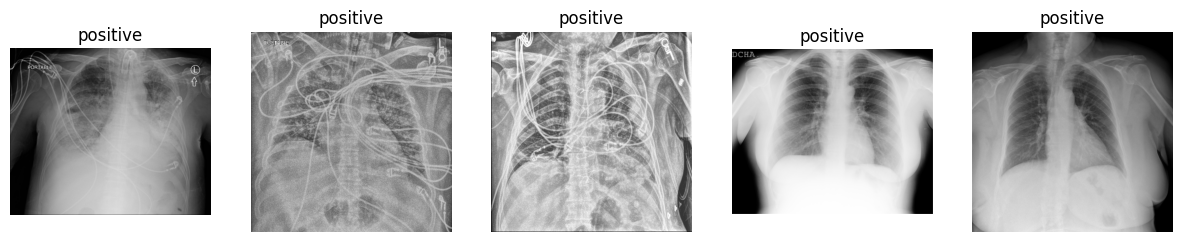

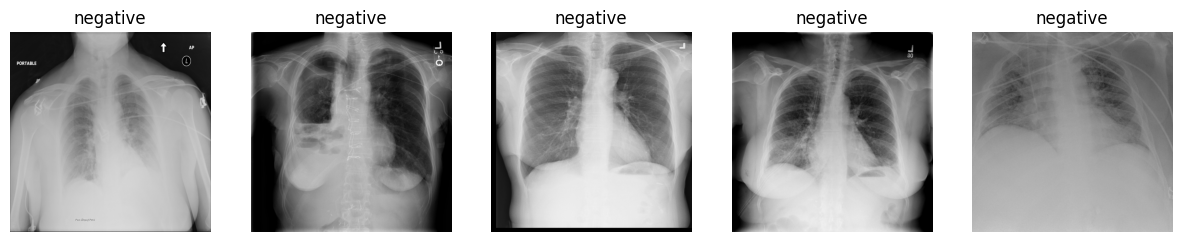

In [46]:
import matplotlib.pyplot as plt
import cv2

def show_samples(df, label, n=5):
    samples = df[df["label"] == label].sample(n)
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(samples.iterrows()):
        img = cv2.imread(row["filepath"])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(label)
        plt.axis("off")
    plt.show()

for cls in test_df["label"].unique():
    show_samples(train_df, cls)


## Proporção das fontes (coluna source)

In [47]:
print(train_df["source"].value_counts())
print(test_df["source"].value_counts())
print(val_df["source"].value_counts())


source
bimcv         43142
stonybrook    12696
rsna           9719
sirm            878
ricord          834
cohen           471
actmed          101
fig1             22
Name: count, dtype: int64
source
bimcv     8082
ricord     200
rsna       200
Name: count, dtype: int64
source
rsna          3869
bimcv         3408
stonybrook     940
cohen           96
sirm            65
ricord          62
actmed          31
fig1             2
Name: count, dtype: int64


## Ver se há pacientes com várias imagens

In [48]:
print(train_df["patient_id"].value_counts().head())
print(test_df["patient_id"].value_counts().head())
print(val_df["patient_id"].value_counts().head())

patient_id
A860070    236
A763364    183
A221230    175
A701295    174
A766483    173
Name: count, dtype: int64
patient_id
S09382    38
S09371    35
S09340    30
S09348    29
S09426    28
Name: count, dtype: int64
patient_id
A958650    122
A767576     69
A793505     51
A244641     46
A680897     45
Name: count, dtype: int64


## Descrição estatística dos tamanhos das imagens

In [49]:
from PIL import Image
import pandas as pd
from tqdm import tqdm


#######################################
#               TRAIN
#######################################

print("\n" + "-"*40)
print("📌 DESCRIÇÃO DAS IMAGENS — TRAIN")
print("-"*40)

heights_train = []
widths_train = []

for fp in tqdm(train_df["filepath"]):
    try:
        with Image.open(fp) as img:
            w, h = img.size
            widths_train.append(w)
            heights_train.append(h)
    except:
        widths_train.append(None)
        heights_train.append(None)

df_sizes_train = pd.DataFrame({
    "width": widths_train,
    "height": heights_train
})

print(df_sizes_train.describe())


#######################################
#               TEST
#######################################

print("\n" + "-"*40)
print("📌 DESCRIÇÃO DAS IMAGENS — TEST")
print("-"*40)

heights_test = []
widths_test = []

for fp in tqdm(test_df["filepath"]):
    try:
        with Image.open(fp) as img:
            w, h = img.size
            widths_test.append(w)
            heights_test.append(h)
    except:
        widths_test.append(None)
        heights_test.append(None)

df_sizes_test = pd.DataFrame({
    "width": widths_test,
    "height": heights_test
})

print(df_sizes_test.describe())


#######################################
#               VAL
#######################################

print("\n" + "-"*40)
print("📌 DESCRIÇÃO DAS IMAGENS — VAL")
print("-"*40)

heights_val = []
widths_val = []

for fp in tqdm(val_df["filepath"]):
    try:
        with Image.open(fp) as img:
            w, h = img.size
            widths_val.append(w)
            heights_val.append(h)
    except:
        widths_val.append(None)
        heights_val.append(None)

df_sizes_val = pd.DataFrame({
    "width": widths_val,
    "height": heights_val
})

print(df_sizes_val.describe())



----------------------------------------
📌 DESCRIÇÃO DAS IMAGENS — TRAIN
----------------------------------------


100%|██████████| 67863/67863 [00:21<00:00, 3110.45it/s]


              width        height
count  67863.000000  67863.000000
mean     914.596584    830.170122
std      212.434963    186.697795
min      157.000000    156.000000
25%     1024.000000    838.000000
50%     1024.000000    843.000000
75%     1024.000000   1024.000000
max     1024.000000   1024.000000

----------------------------------------
📌 DESCRIÇÃO DAS IMAGENS — TEST
----------------------------------------


100%|██████████| 8482/8482 [00:05<00:00, 1605.70it/s]


             width       height
count  8482.000000  8482.000000
mean   1019.528649   894.531007
std      23.375884    82.648053
min     761.000000   553.000000
25%    1024.000000   839.000000
50%    1024.000000   843.000000
75%    1024.000000  1004.000000
max    1024.000000  1024.000000

----------------------------------------
📌 DESCRIÇÃO DAS IMAGENS — VAL
----------------------------------------


100%|██████████| 8473/8473 [00:02<00:00, 4000.14it/s]

             width       height
count  8473.000000  8473.000000
mean    958.132067   899.349109
std     173.670585   172.318294
min     256.000000   256.000000
25%    1024.000000   841.000000
50%    1024.000000  1024.000000
75%    1024.000000  1024.000000
max    1024.000000  1024.000000


## Visualização dos Exemplo

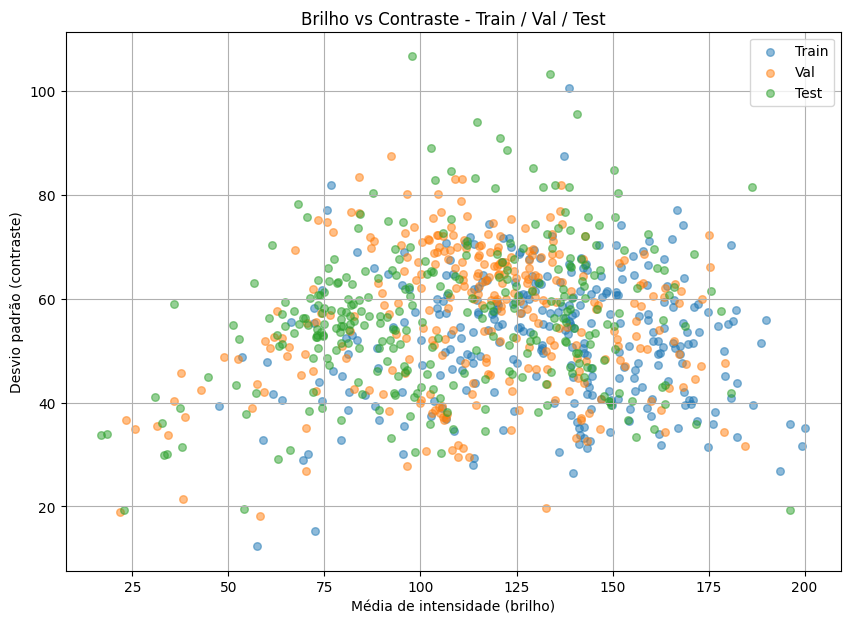

In [50]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

def compute_image_stats(df, img_path, sample=300):
    means = []
    stds = []

    # Caso sample seja maior que o dataset
    sample = min(sample, len(df))
    subset = df.sample(sample)

    for filename in subset["filename"]:
        img = cv2.imread(os.path.join(img_path, filename), cv2.IMREAD_GRAYSCALE)

        if img is None:
            continue  # Pula arquivos corrompidos

        means.append(img.mean())
        stds.append(img.std())

    return np.array(means), np.array(stds)



# --- Compute stats for each dataset ---
means_train, stds_train = compute_image_stats(train_df, path_train_img)
means_val, stds_val = compute_image_stats(val_df, path_val_img)
means_test, stds_test = compute_image_stats(test_df, path_test_img)


# --- Plot ---
plt.figure(figsize=(10, 7))

plt.scatter(means_train, stds_train, alpha=0.5, label="Train", s=30)
plt.scatter(means_val, stds_val, alpha=0.5, label="Val", s=30)
plt.scatter(means_test, stds_test, alpha=0.5, label="Test", s=30)

plt.xlabel("Média de intensidade (brilho)")
plt.ylabel("Desvio padrão (contraste)")
plt.title("Brilho vs Contraste - Train / Val / Test")
plt.legend()
plt.grid(True)
plt.show()


## ANÁLISE DE CORES RGB

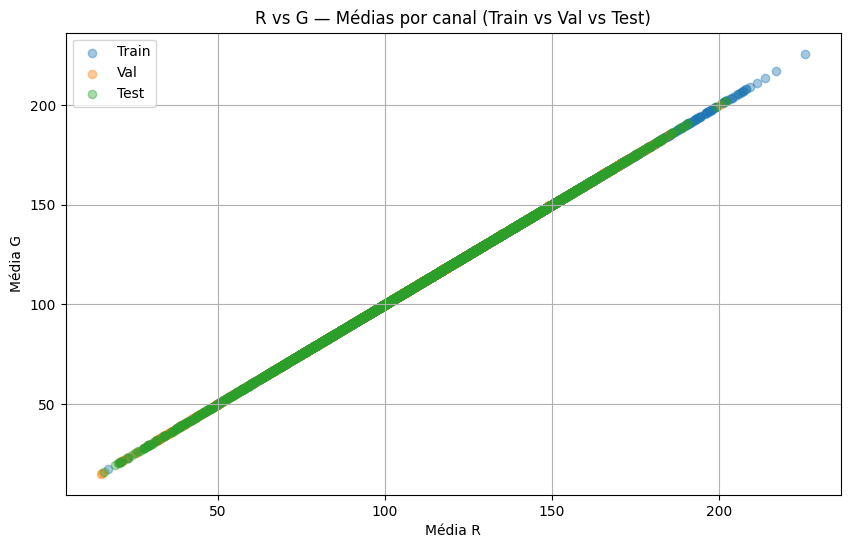

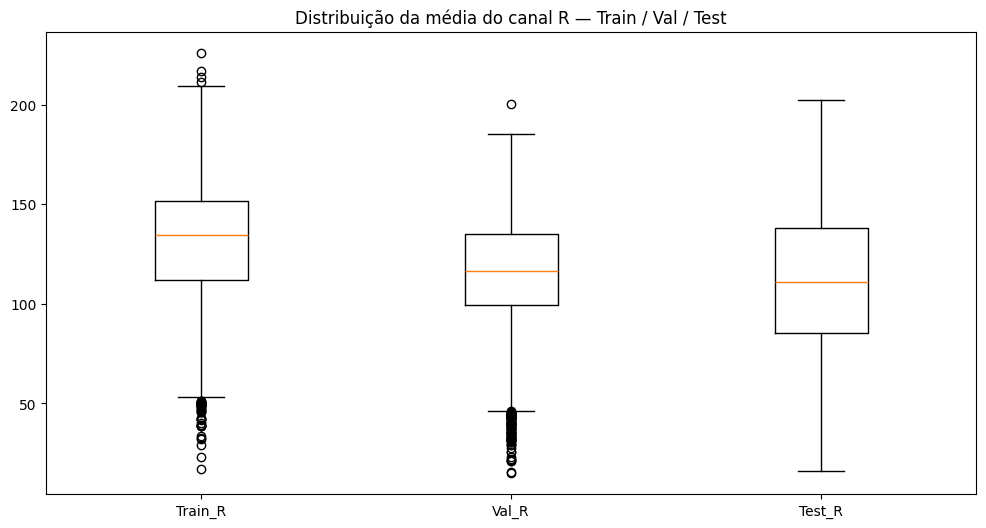

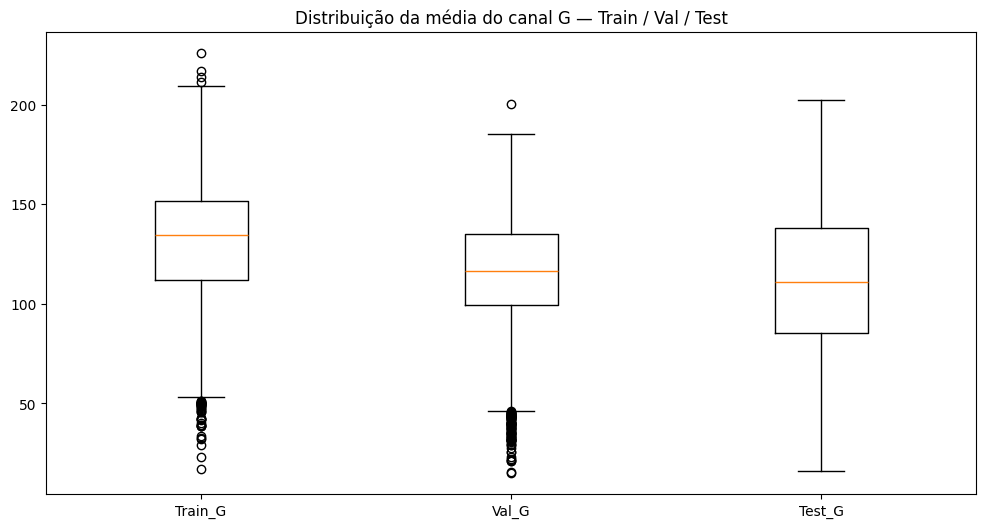

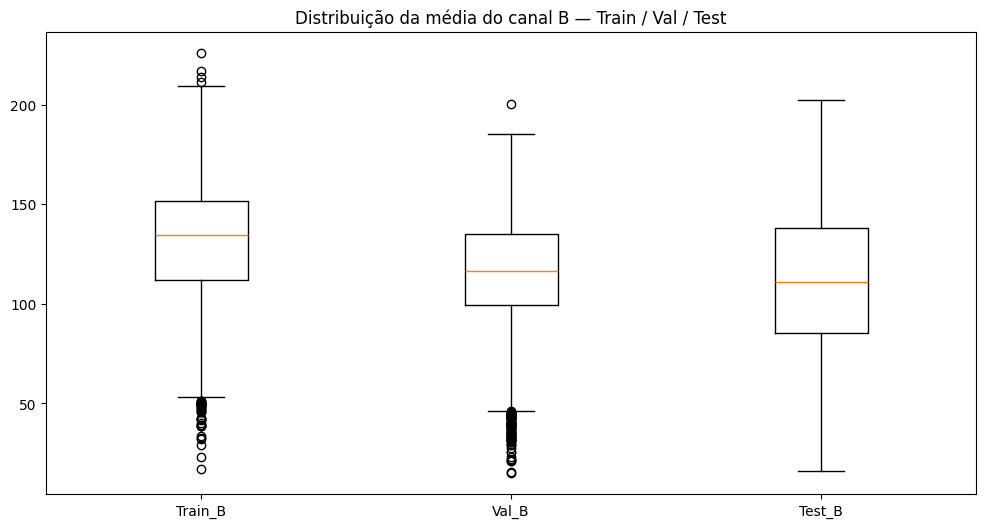

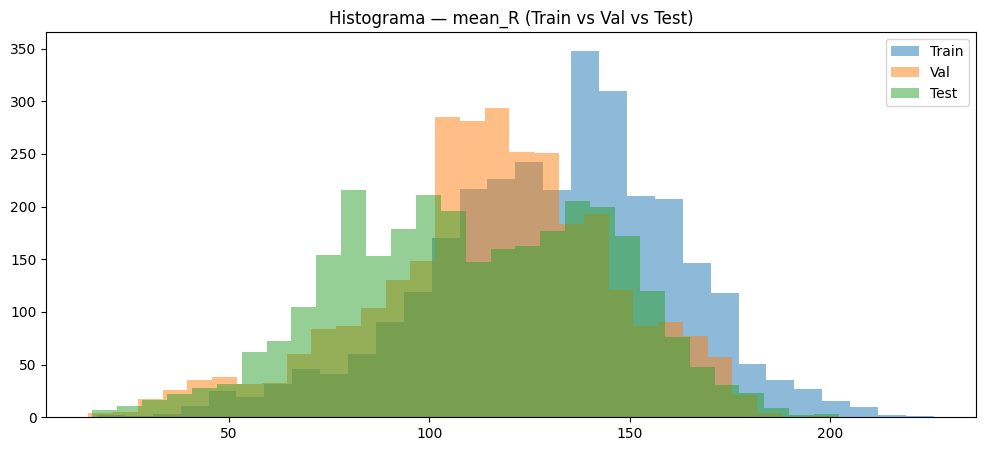

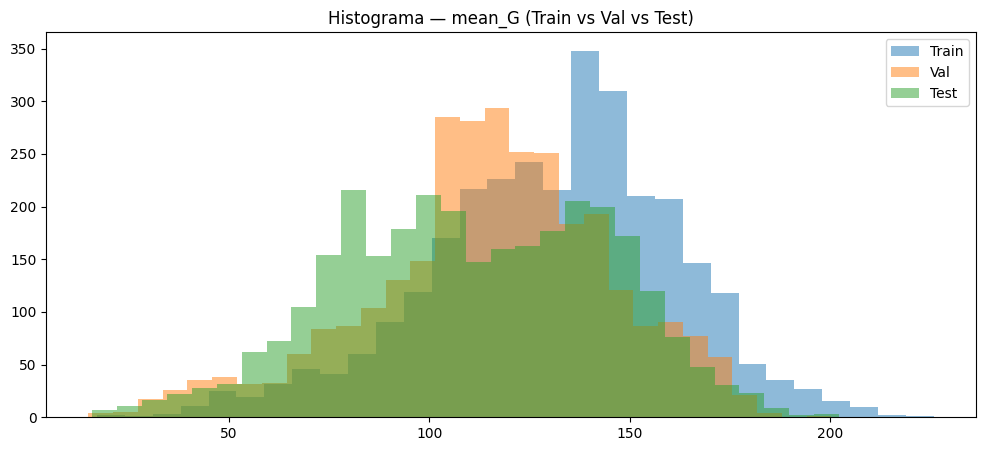

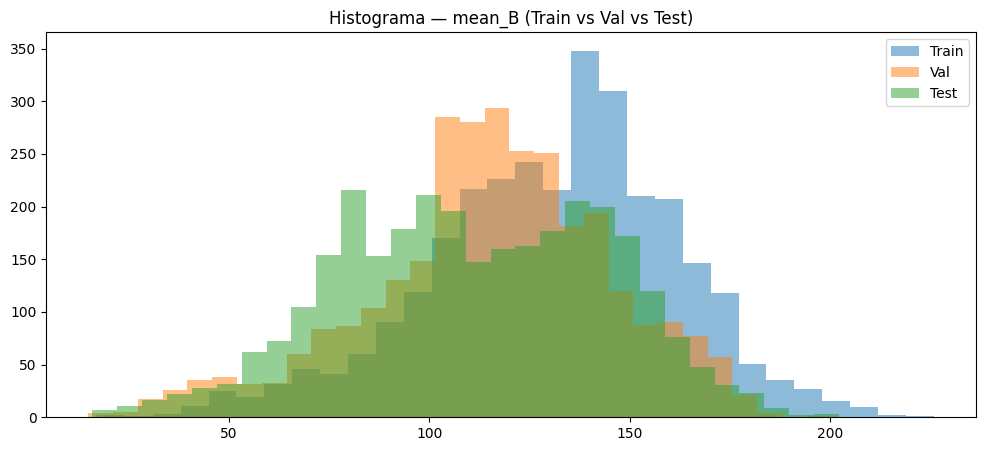

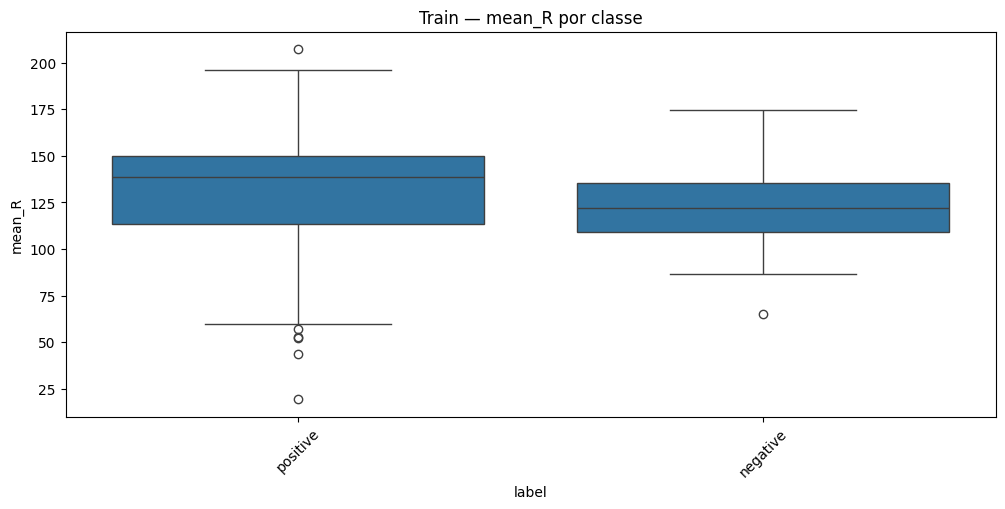

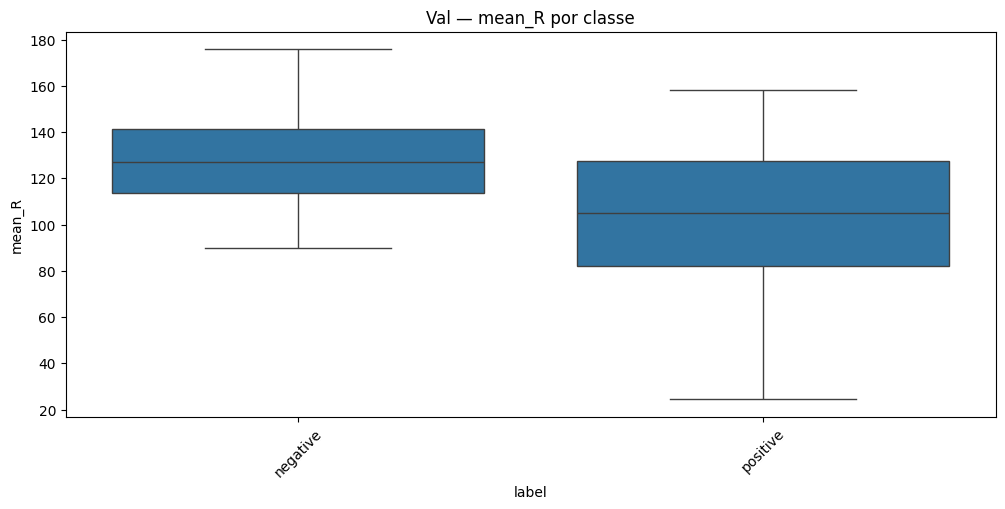

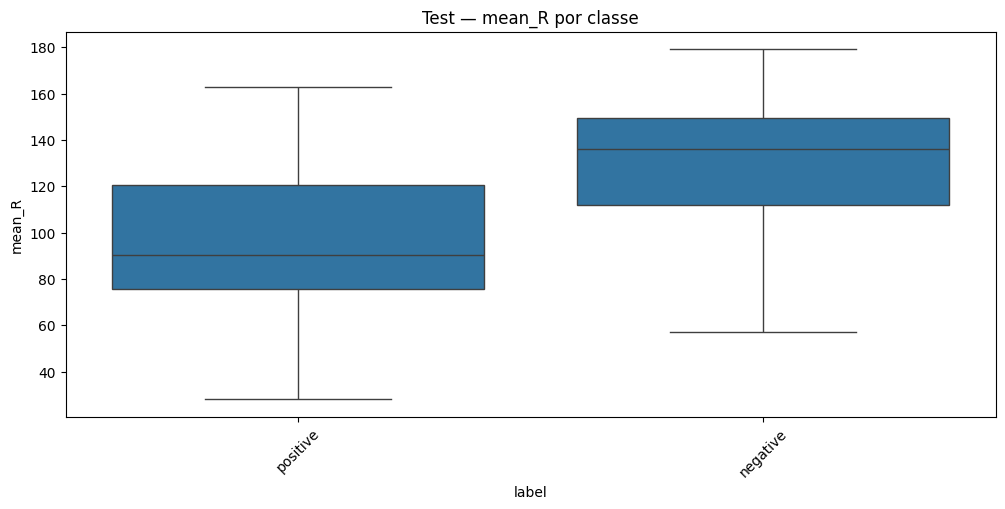

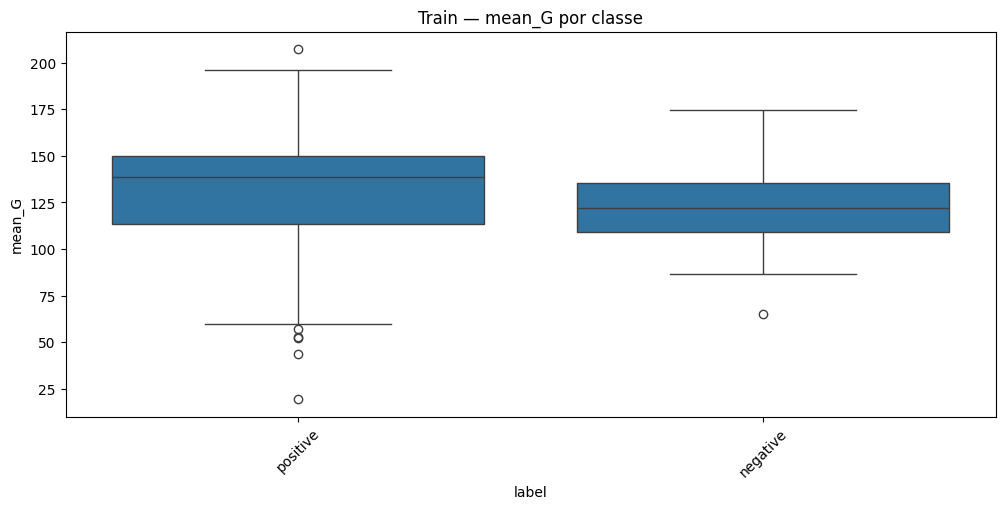

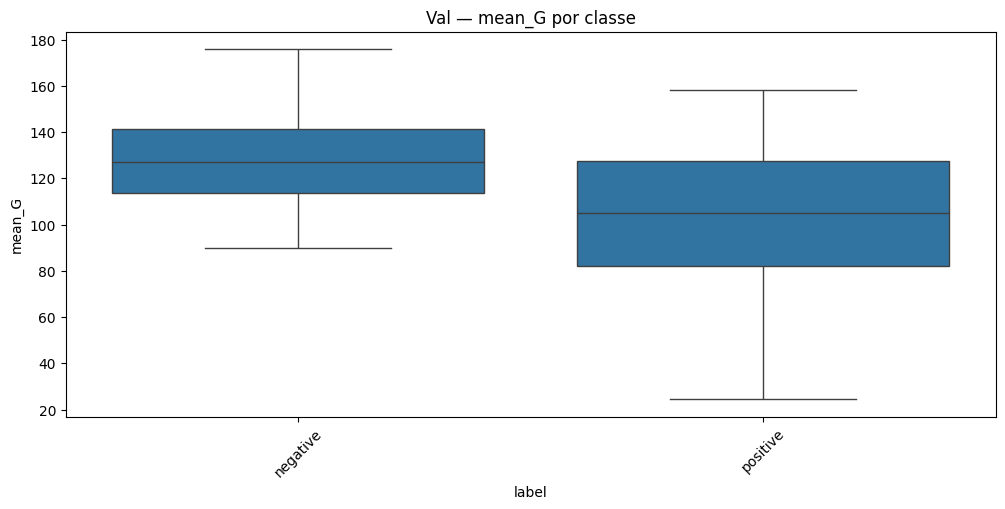

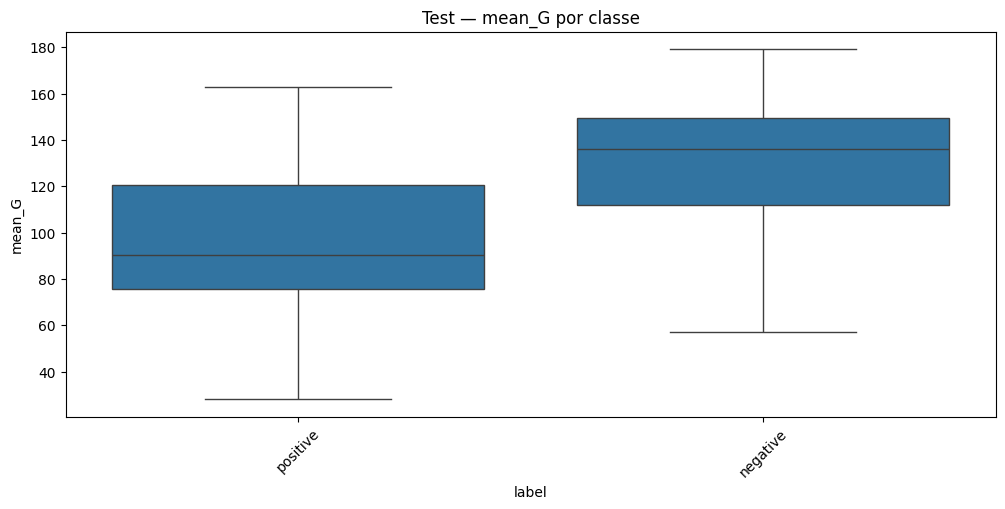

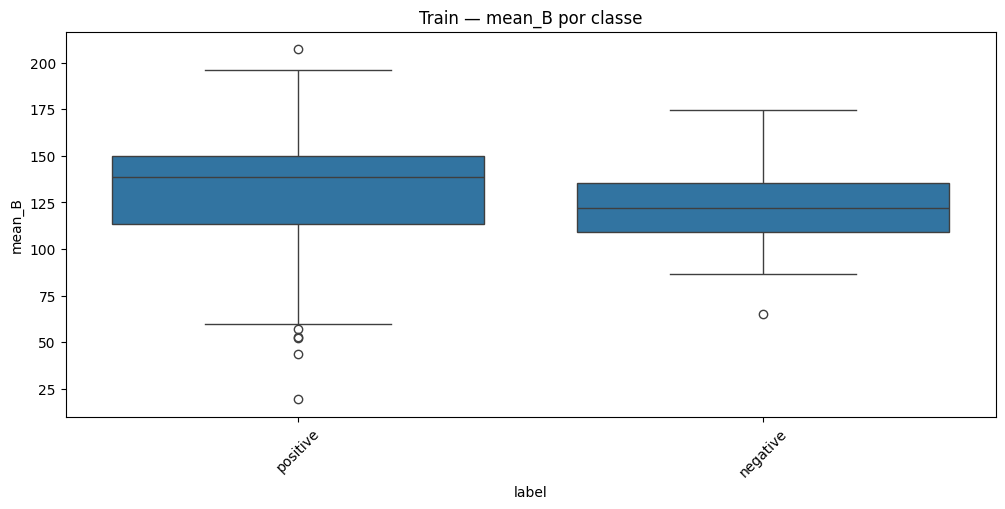

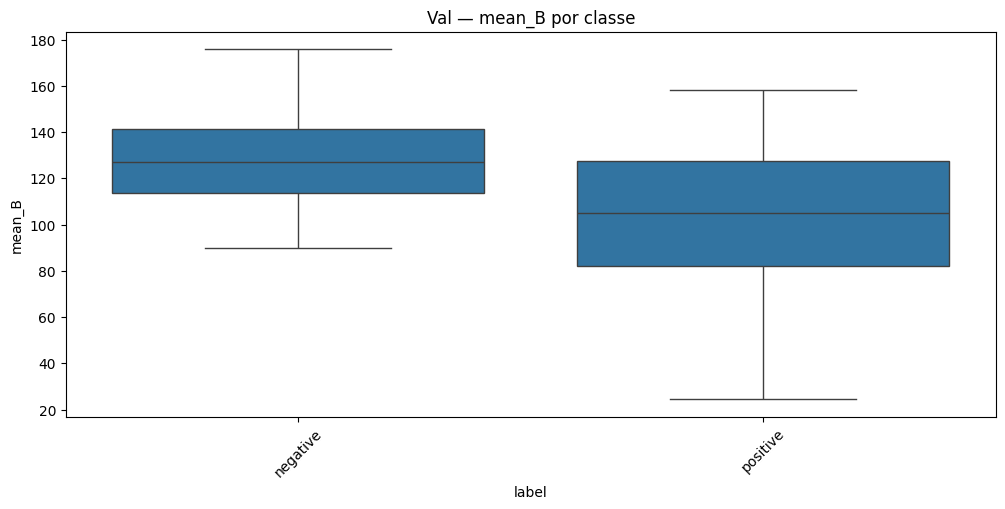

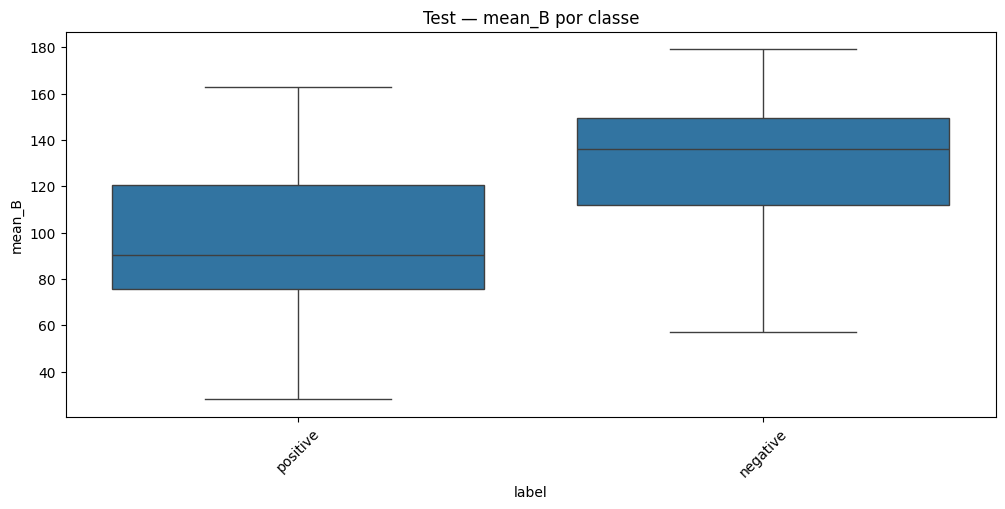

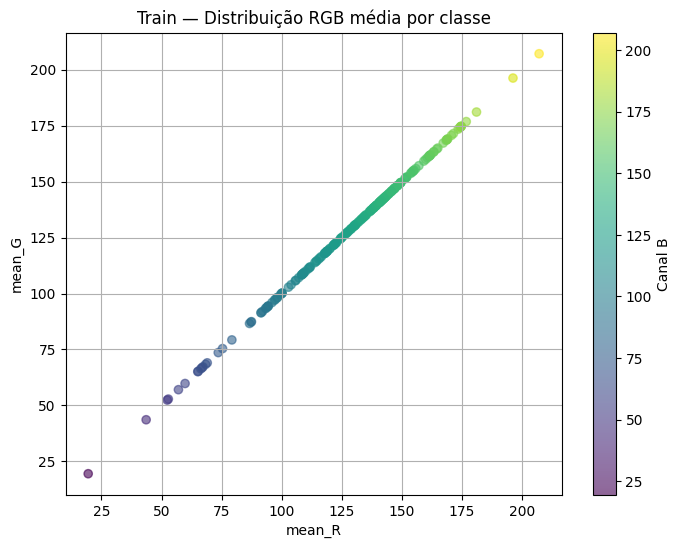

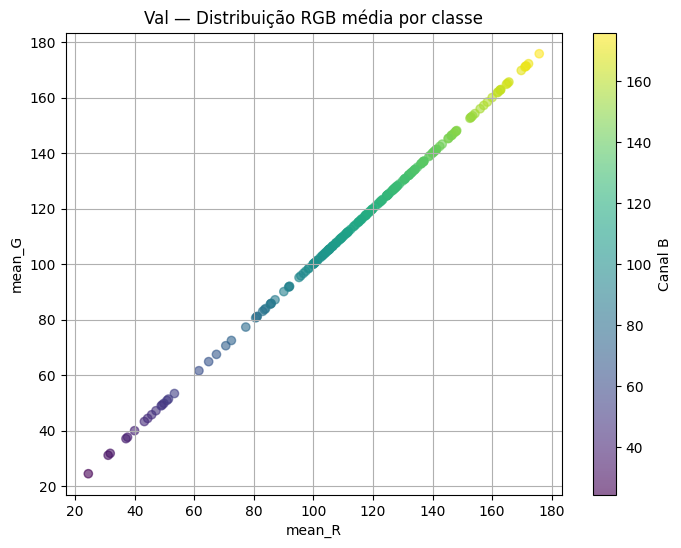

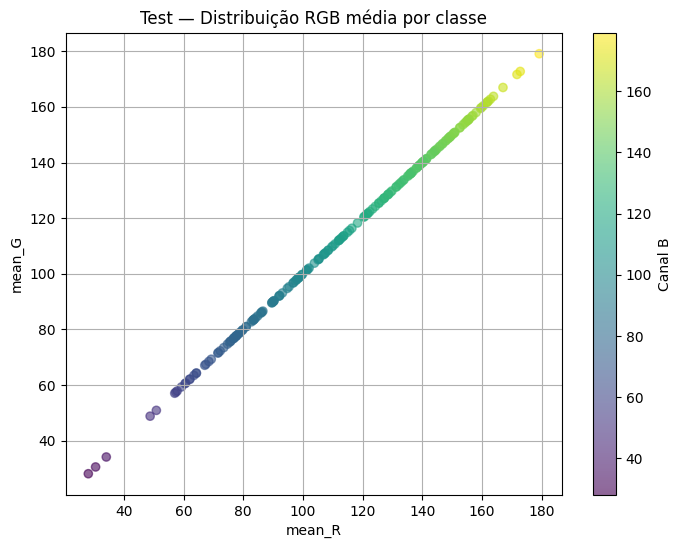

In [51]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================
# 1) Função para estatísticas gerais por imagem
# ============================================================
def compute_color_stats(df, img_path, sample=3000):
    sample = min(sample, len(df))
    subset = df.sample(sample)

    means_R, means_G, means_B = [], [], []
    stds_R, stds_G, stds_B   = [], [], []

    for filename in subset["filename"]:
        img = cv2.imread(os.path.join(img_path, filename))
        if img is None:
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]

        means_R.append(R.mean()); means_G.append(G.mean()); means_B.append(B.mean())
        stds_R.append(R.std());   stds_G.append(G.std());   stds_B.append(B.std())

    return pd.DataFrame({
        "mean_R": means_R,
        "mean_G": means_G,
        "mean_B": means_B,
        "std_R": stds_R,
        "std_G": stds_G,
        "std_B": stds_B,
    })


# ============================================================
# 2) Calcular estatísticas para TRAIN, VAL e TEST
# ============================================================
stats_train = compute_color_stats(train_df, path_train_img)
stats_val   = compute_color_stats(val_df,   path_val_img)
stats_test  = compute_color_stats(test_df,  path_test_img)


# ============================================================
# 3) Scatter R vs G — Train vs Val vs Test
# ============================================================
plt.figure(figsize=(10,6))
plt.scatter(stats_train["mean_R"], stats_train["mean_G"], alpha=0.4, label="Train")
plt.scatter(stats_val["mean_R"],   stats_val["mean_G"],   alpha=0.4, label="Val")
plt.scatter(stats_test["mean_R"],  stats_test["mean_G"],  alpha=0.4, label="Test")

plt.xlabel("Média R")
plt.ylabel("Média G")
plt.title("R vs G — Médias por canal (Train vs Val vs Test)")
plt.legend()
plt.grid(True)
plt.show()


# ============================================================
# 4) Boxplots — Train vs Val vs Test (médias RGB)
# ============================================================
plt.figure(figsize=(12,6))
plt.boxplot(
    [
        stats_train["mean_R"], stats_val["mean_R"], stats_test["mean_R"]
    ],
    labels=["Train_R", "Val_R", "Test_R"]
)
plt.title("Distribuição da média do canal R — Train / Val / Test")
plt.show()

plt.figure(figsize=(12,6))
plt.boxplot(
    [
        stats_train["mean_G"], stats_val["mean_G"], stats_test["mean_G"]
    ],
    labels=["Train_G", "Val_G", "Test_G"]
)
plt.title("Distribuição da média do canal G — Train / Val / Test")
plt.show()

plt.figure(figsize=(12,6))
plt.boxplot(
    [
        stats_train["mean_B"], stats_val["mean_B"], stats_test["mean_B"]
    ],
    labels=["Train_B", "Val_B", "Test_B"]
)
plt.title("Distribuição da média do canal B — Train / Val / Test")
plt.show()


# ============================================================
# 5) Histogramas — Train vs Val vs Test
# ============================================================
def plot_hist_all(stats_train, stats_val, stats_test, canal):
    plt.figure(figsize=(12,5))
    plt.hist(stats_train[canal], bins=30, alpha=0.5, label="Train")
    plt.hist(stats_val[canal],   bins=30, alpha=0.5, label="Val")
    plt.hist(stats_test[canal],  bins=30, alpha=0.5, label="Test")
    plt.title(f"Histograma — {canal} (Train vs Val vs Test)")
    plt.legend()
    plt.show()

plot_hist_all(stats_train, stats_val, stats_test, "mean_R")
plot_hist_all(stats_train, stats_val, stats_test, "mean_G")
plot_hist_all(stats_train, stats_val, stats_test, "mean_B")


# ============================================================
# 6) Estatísticas por classe — função
# ============================================================
def color_stats_by_class(df, img_path, sample=200):
    df = df.sample(min(sample, len(df)))
    results = []

    for _, row in df.iterrows():
        filename, label = row["filename"], row["label"]

        img = cv2.imread(os.path.join(img_path, filename))
        if img is None:
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]

        results.append([label, R.mean(), G.mean(), B.mean()])

    return pd.DataFrame(results, columns=["label", "mean_R", "mean_G", "mean_B"])


# ============================================================
# 7) Estatísticas por classe para TRAIN, VAL e TEST
# ============================================================
train_by_class = color_stats_by_class(train_df, path_train_img)
val_by_class   = color_stats_by_class(val_df,   path_val_img)
test_by_class  = color_stats_by_class(test_df,  path_test_img)


# ============================================================
# 8) Boxplots por classe — Train / Val / Test
# ============================================================
def plot_box_by_class(df, canal, split_name):
    plt.figure(figsize=(12,5))
    sns.boxplot(data=df, x="label", y=canal)
    plt.title(f"{split_name} — {canal} por classe")
    plt.xticks(rotation=45)
    plt.show()

for canal in ["mean_R", "mean_G", "mean_B"]:
    plot_box_by_class(train_by_class, canal, "Train")
    plot_box_by_class(val_by_class,   canal, "Val")
    plot_box_by_class(test_by_class,  canal, "Test")


# ============================================================
# 9) Scatter RGB por classe (Train, Val, Test)
# ============================================================
def plot_rgb_scatter(df, title):
    plt.figure(figsize=(8,6))
    plt.scatter(df["mean_R"], df["mean_G"], c=df["mean_B"], cmap="viridis", alpha=0.6)
    plt.colorbar(label="Canal B")
    plt.xlabel("mean_R")
    plt.ylabel("mean_G")
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_rgb_scatter(train_by_class, "Train — Distribuição RGB média por classe")
plot_rgb_scatter(val_by_class,   "Val — Distribuição RGB média por classe")
plot_rgb_scatter(test_by_class,  "Test — Distribuição RGB média por classe")
